# ASASSN-18pg

In [1]:
import pandas
import matplotlib.pyplot as plt

In [2]:
data = pandas.read_csv('../Files/ASASSN-18pg_decam_charlotte/original.txt', sep='\s+', header=None)
data.columns = ['Telescope', 'Date', 'Wavelength', 'Flux Density']
data['group_id'] = data['Telescope'].ne(data['Telescope'].shift()).cumsum()
grouped = data.groupby(['Telescope', 'group_id'])
groups = [group_data for group_name, group_data in grouped]

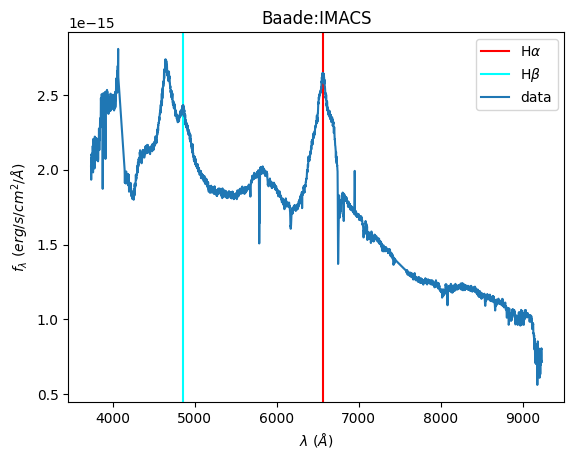

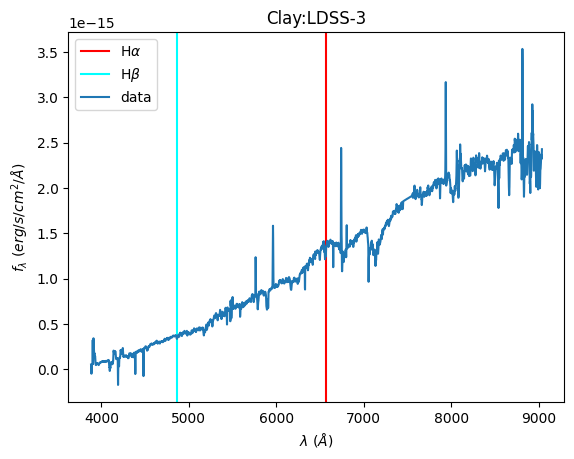

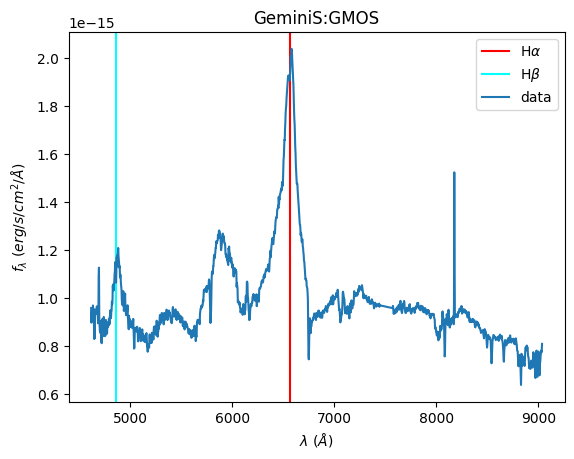

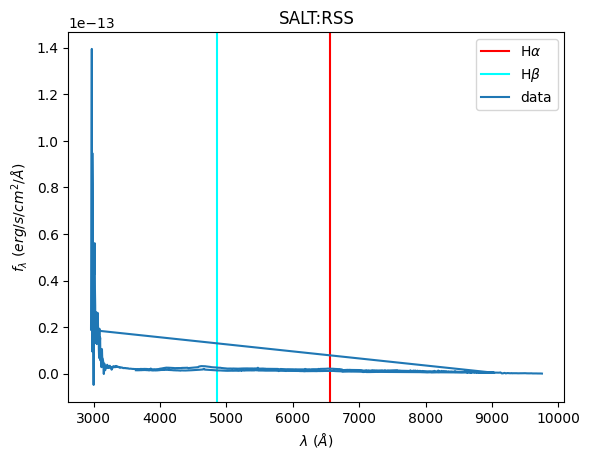

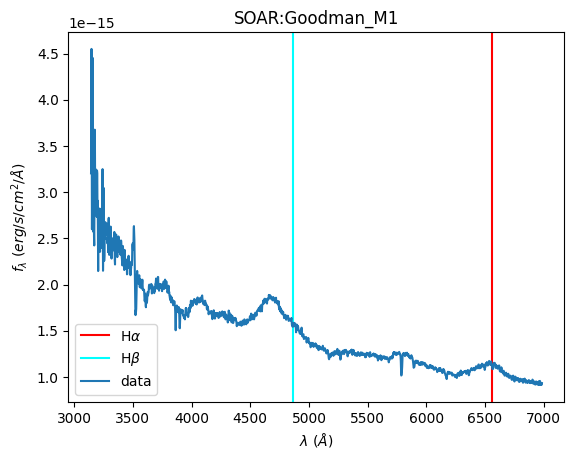

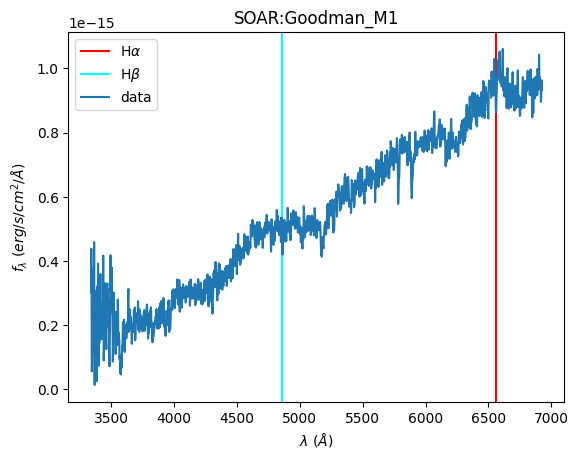

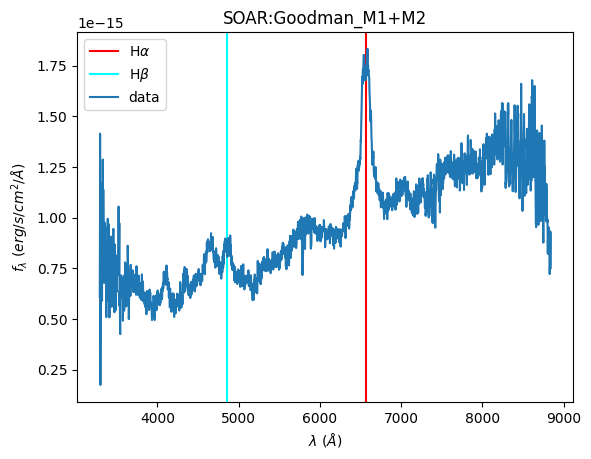

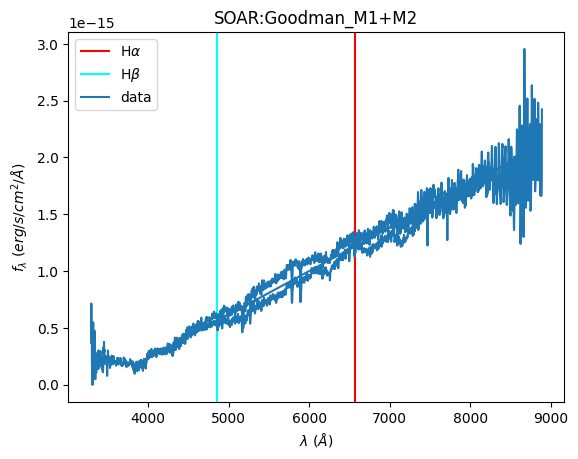

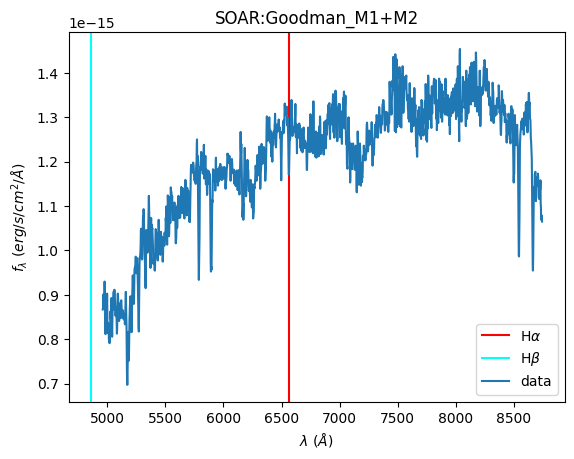

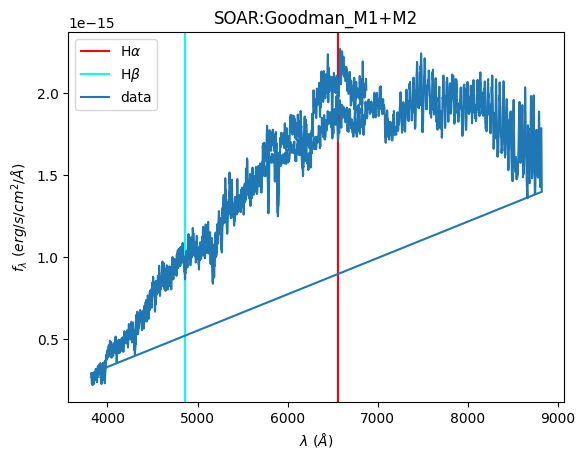

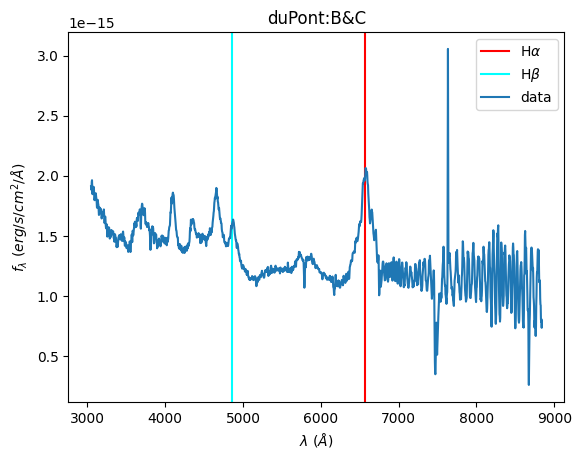

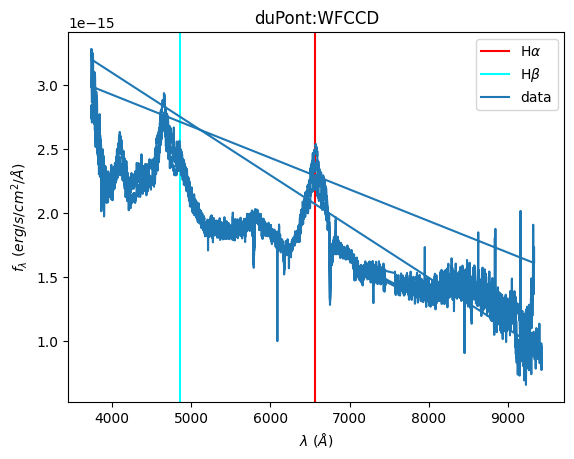

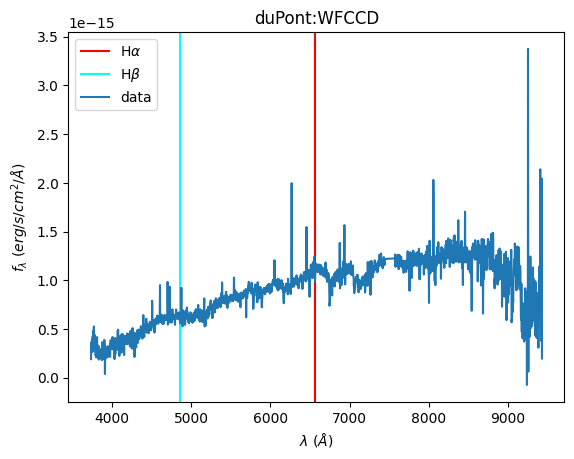

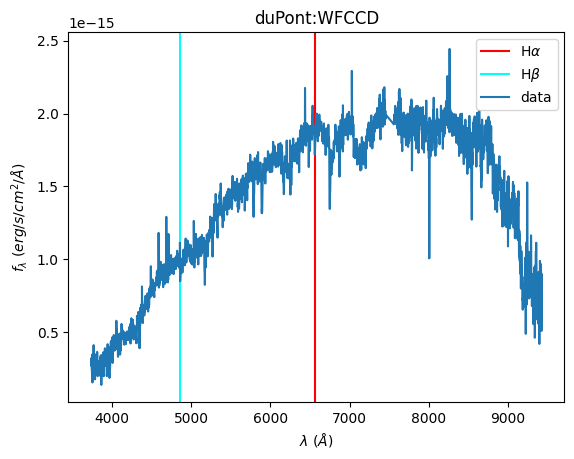

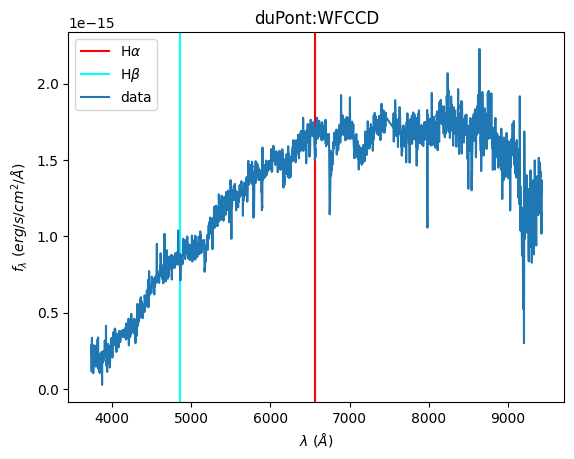

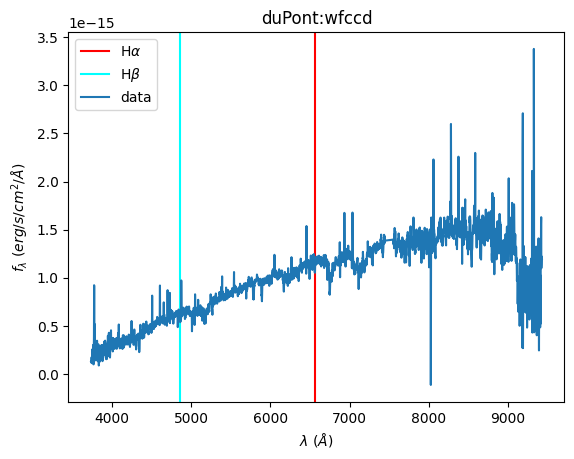

In [3]:
z = 0

for spectrum in groups:
    wl = spectrum['Wavelength']
    flux = spectrum['Flux Density']

    plt.figure()
    plt.axvline(6563, label=r'H$\alpha$', color='red'); plt.axvline(4861, label=r'H$\beta$', color='cyan')
    plt.plot(wl/(1+z), flux, label='data')
    plt.xlabel('$\lambda$ ($\AA$)'); plt.ylabel(r'$f_{\lambda}$ ($erg/s/cm^{2}/\AA$)')
    plt.title(f'{spectrum.iloc[0, 0]}'); plt.legend(); plt.show()

In [5]:
groups[-1]

,Telescope,Date,Wavelength,Flux Density,group_id
39277,duPont:wfccd,190510,3733.1,1.322000e-16,12
39278,duPont:wfccd,190510,3734.9,1.318000e-16,12
39279,duPont:wfccd,190510,3736.8,1.180000e-16,12
39280,duPont:wfccd,190510,3738.6,1.335000e-16,12
39281,duPont:wfccd,190510,3740.5,1.736000e-16,12
...,...,...,...,...,...
42341,duPont:wfccd,190510,9423.5,1.099000e-15,12
42342,duPont:wfccd,190510,9425.3,1.135000e-15,12
42343,duPont:wfccd,190510,9427.2,1.221000e-15,12
42344,duPont:wfccd,190510,9429.0,1.212000e-15,12


In [8]:
len(groups)

16

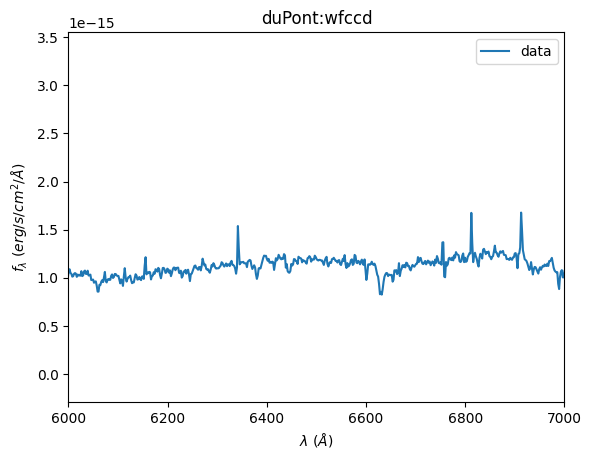

In [12]:
wl = groups[15]['Wavelength']
flux = groups[15]['Flux Density']

plt.figure()
plt.xlim(6000, 7000)
#plt.axvline(6563, label=r'H$\alpha$', color='red'); plt.axvline(4861, label=r'H$\beta$', color='cyan')
plt.plot(wl/(1+0.018), flux, label='data')
plt.xlabel('$\lambda$ ($\AA$)'); plt.ylabel(r'$f_{\lambda}$ ($erg/s/cm^{2}/\AA$)')
plt.title(f'{spectrum.iloc[0, 0]}'); plt.legend(); plt.show()